In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.shape         ####Shape of the dataset

(29531, 16)

In [ ]:
df.info()       ### data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe() ## data stat

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.isna().sum()       ### Missing value

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


In [ ]:
### Here the drop the column Xylene
df.drop(columns='Xylene', inplace=True)

In [ ]:
## Also drop the columns PM10 and NH3
df.drop(columns=['PM10', 'NH3'], inplace=True)

In [ ]:
### Also drop Toluene column
df.drop(columns='Toluene', inplace=True)

In [ ]:
missing_values_table(df)

Your selected dataframe has 12 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6
SO2,3854,13.1
NO2,3585,12.1
NO,3582,12.1
CO,2059,7.0


In [ ]:
df['AQI_Bucket']

,AQI_Bucket
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
29526,Good
29527,Satisfactory
29528,Satisfactory
29529,Satisfactory


In [ ]:
###Fill Missing value in AQI_Bucket
for i,each in enumerate(df['AQI_Bucket']):
    if pd.isnull(df['AQI_Bucket'].iloc[i]):
        if df['AQI'].iloc[i]>=0.0 and df['AQI'].iloc[i]<=50.0:
            df['AQI_Bucket'].iloc[i]='Good'
        elif df['AQI'].iloc[i]>=51.0 and df['AQI'].iloc[i]<=100.0:
            df['AQI_Bucket'].iloc[i]='Satisfactory'
        elif df['AQI'].iloc[i]>=101.0 and df['AQI'].iloc[i]<=200.0:
            df['AQI_Bucket'].iloc[i]='Moderate'
        elif df['AQI'].iloc[i]>=201.0 and df['AQI'].iloc[i]<=300.0:
            df['AQI_Bucket'][i]='Poor'
        elif df['AQI'].iloc[i]>=301.0 and df['AQI'].iloc[i]<=400.0:
            df['AQI_Bucket'].iloc[i]='Very Poor'
        else:
            df['AQI_Bucket'].iloc[i]='Severe'

Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-288380621.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI_Bucket'].iloc[i]='Severe'
/tmp/ipython-input-288380621.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI_Bucket'].iloc[i]='Severe'
/tmp/ipython-input-288380621.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI_Bucket'].iloc[i]='Severe'
/tmp/ipython-input-288380621.py:15: Sett

In [ ]:
missing_values_table(df)

Your selected dataframe has 12 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
Benzene,5623,19.0
AQI,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6
SO2,3854,13.1
NO2,3585,12.1
NO,3582,12.1
CO,2059,7.0


In [ ]:
na_features = ['Benzene','AQI','PM2.5','NOx','O3','SO2','NO2','NO','CO']

In [ ]:
### Now we will handle missing value which is below the 20 % in the data with the mean
df[na_features] = df[na_features].fillna(value=df[na_features].mean())

df.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,166.463581,Severe
1,Ahmedabad,2015-01-02,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,166.463581,Severe
2,Ahmedabad,2015-01-03,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,166.463581,Severe
3,Ahmedabad,2015-01-04,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,166.463581,Severe
4,Ahmedabad,2015-01-05,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,166.463581,Severe


In [ ]:
num_features = []
cat_features = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_features.append(i)
    else:
        num_features.append(i)



In [ ]:
df[num_features].corr()     ### This is corr metrics

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
PM2.5,1.000000,0.426375,0.344341,0.380725,0.086663,0.119512,0.155330,0.021934,0.628860
NO,0.426375,1.000000,0.462402,0.746223,0.211639,0.166190,0.014218,0.033901,0.430600
NO2,0.344341,0.462402,1.000000,0.574190,0.353237,0.382758,0.285448,0.025082,0.522994
NOx,0.380725,0.746223,0.574190,1.000000,0.225097,0.208355,0.083063,0.037383,0.438363
CO,0.086663,0.211639,0.353237,0.225097,1.000000,0.472583,0.039787,0.061351,0.649679
SO2,0.119512,0.166190,0.382758,0.208355,0.472583,1.000000,0.156610,0.033059,0.452768
O3,0.155330,0.014218,0.285448,0.083063,0.039787,0.156610,1.000000,0.018748,0.188590
Benzene,0.021934,0.033901,0.025082,0.037383,0.061351,0.033059,0.018748,1.000000,0.041518
AQI,0.628860,0.430600,0.522994,0.438363,0.649679,0.452768,0.188590,0.041518,1.000000


<Axes: >

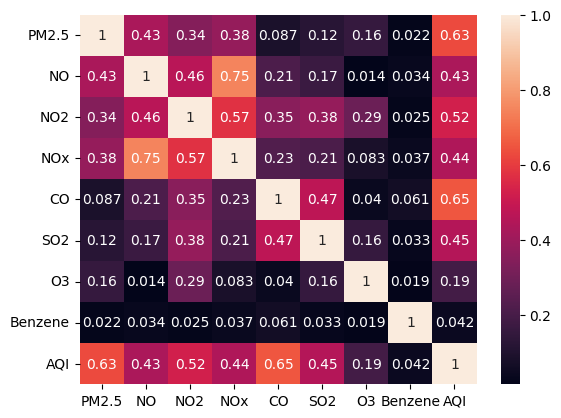

In [ ]:
sns.heatmap(df[num_features].corr(), annot=True)   ### Heatmap for the numerical column which is show corr matrix

<Axes: xlabel='Date', ylabel='AQI'>

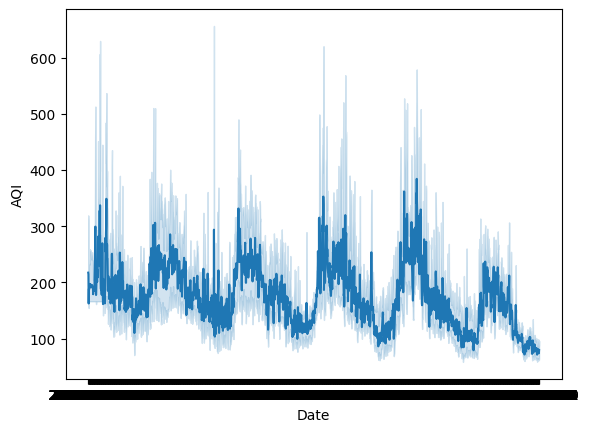

In [ ]:
sns.lineplot(x=df['Date'], y=df['AQI'])         ## This is line plot between Date and AQI

<Axes: xlabel='AQI_Bucket', ylabel='AQI'>

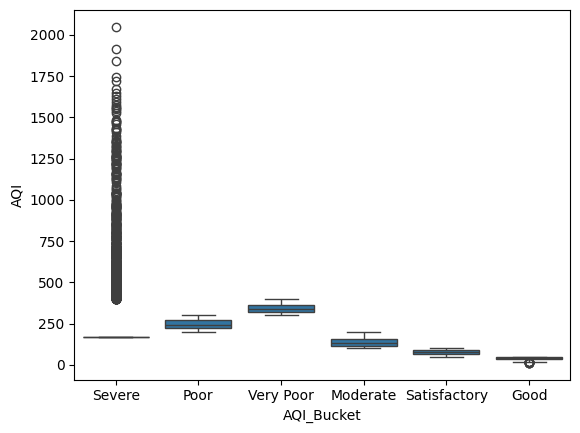

In [ ]:
sns.boxplot(x=df['AQI_Bucket'], y=df['AQI'])    ### In Severe have more outliers

<Axes: xlabel='AQI', ylabel='Count'>

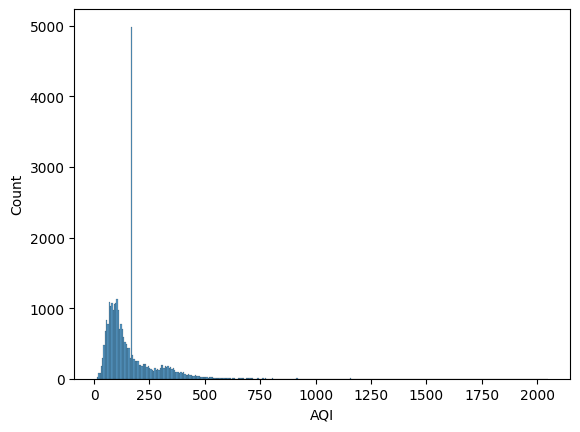

In [ ]:
sns.histplot(df['AQI'])

# Practical Result Template
### Student Name: Akshit Vaghasiya
### Roll No.: 23DIT075
### Platform Used: Google Colab